# <span style="color:#0F19C9">Contents</span>

- [Importing and reading data](#importing-and-reading-data)
- [Data understanding](#data-understanding)
- [Univariable analysis](#univariable-analysis)

# <span style="color:#0F19C9">Importing and reading data</span>

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Import my color palette
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']

# Setting plot font
plt.rc('font', family='Georgia', size=12)

In [79]:
# Import the processed file
df = pd.read_csv('../Data/Processed/processed_data.csv')

# <span style="color:#0F19C9">Data understanding</span>

In [80]:
# Display the shape of the dataframe
df.shape

(61210, 7)

In [81]:
# Show the first 5 rows
df.head(5)

,User_ID,Track,Artist,Genre,City,Hour_of_Play,Day_of_the_Week
0,FFB692EC,Kamigata To Boots,The Mass Missile,Rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,Rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,Pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,Folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,Dance,Springfield,08:34:34,Monday


In [82]:
# Change the type of data of 'Hour_of_Play'
df['Hour_of_Play'] = pd.to_datetime(
    df['Hour_of_Play'], format='%H:%M:%S').dt.time

We have 61.210 rows with the music consumption of two United States cities. We have cleaned the set and these are the final and clean dataset to work.

# <span style="color:#0F19C9">Univariable analysis</span>

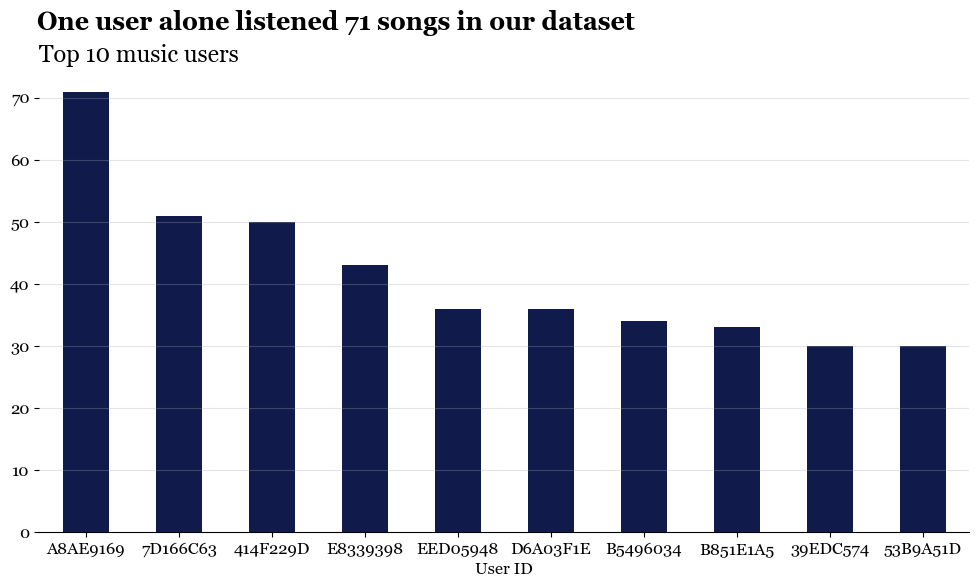

User_ID
A8AE9169    71
7D166C63    51
414F229D    50
E8339398    43
EED05948    36
D6A03F1E    36
B5496034    34
B851E1A5    33
39EDC574    30
53B9A51D    30
Name: count, dtype: int64

In [177]:
# Top Users
fig, ax = plt.subplots(figsize=[12, 6])
df['User_ID'].value_counts().head(10).plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('One user alone listened 71 songs in our dataset',
             ha='left', x=0.123, size=18, weight='bold')
plt.title('Top 10 music users', loc='left', size=17)
plt.xlabel('User ID')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
plt.xticks(rotation=0)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Show the count
df['User_ID'].value_counts().head(10)

In [84]:
# Count the unique tracks
df['Track'].nunique() / df.shape[0] * 100

64.77209606273485

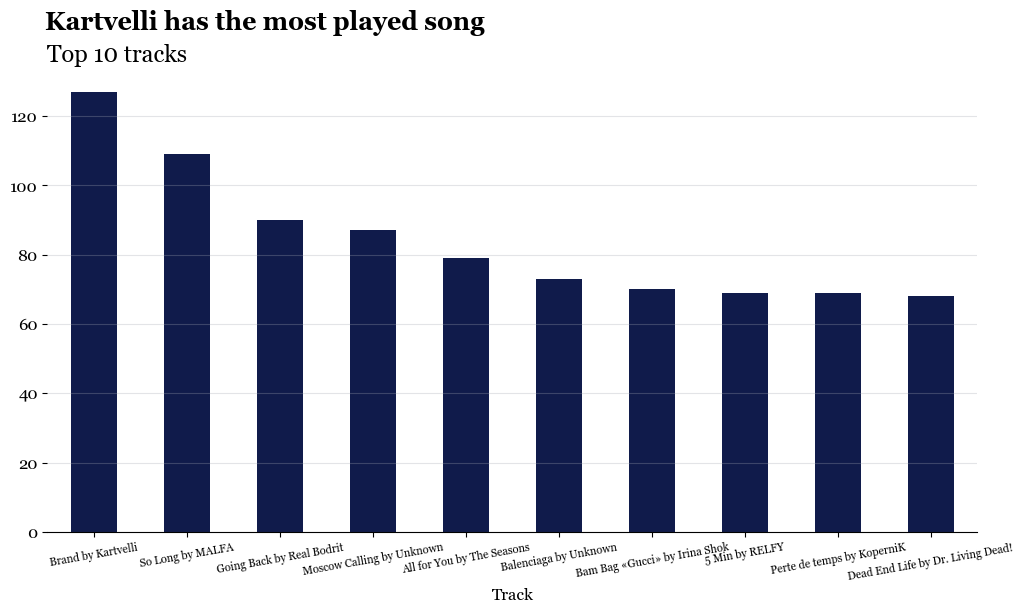

Track_n_Artist
Unknown by Unknown                   1260
Brand by Kartvelli                    127
So Long by MALFA                      109
Going Back by Real Bodrit              90
Moscow Calling by Unknown              87
All for You by The Seasons             79
Balenciaga by Unknown                  73
Bam Bag «Gucci» by Irina Shok          70
5 Min by RELFY                         69
Perte de temps by KoperniK             69
Dead End Life by Dr. Living Dead!      68
Name: count, dtype: int64

In [179]:
# Most listened tracks
df['Track_n_Artist'] = df['Track'] + ' by ' + df['Artist']
fig, ax = plt.subplots(figsize=[12, 6])
df['Track_n_Artist'].value_counts().iloc[1:11] \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Kartvelli has the most played song',
             ha='left', x=0.123, size=18, weight='bold')
plt.title('Top 10 tracks', loc='left', size=17)
plt.xlabel('Track')
plt.grid(True, color=juan_colors[2], axis='y',
         alpha=0.3)
plt.xticks(rotation=10, size=8)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Show the count in a table
df['Track_n_Artist'].value_counts().iloc[0:11]

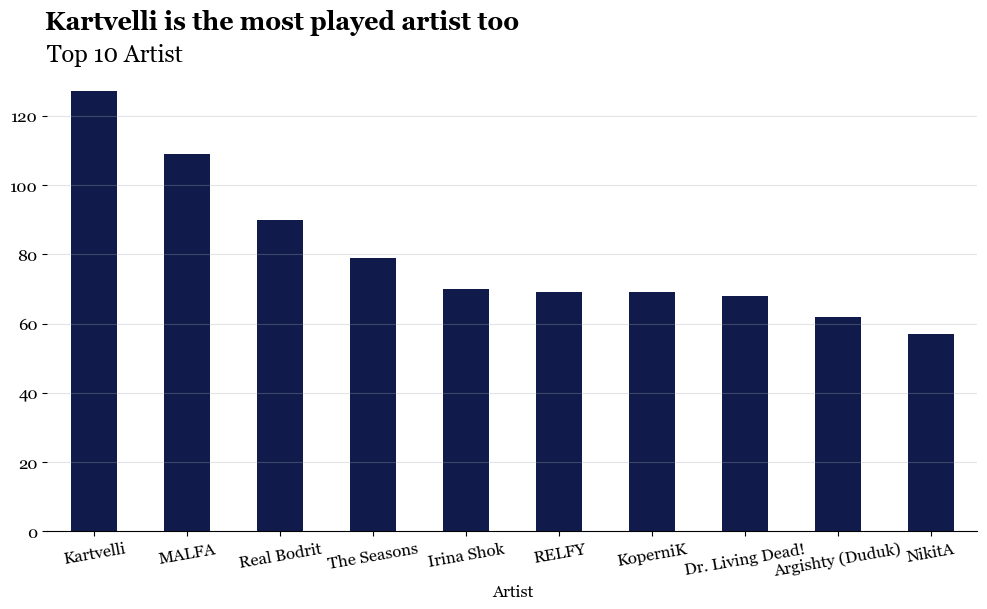

Artist
Unknown             7093
Kartvelli            127
MALFA                109
Real Bodrit           90
The Seasons           79
Irina Shok            70
RELFY                 69
KoperniK              69
Dr. Living Dead!      68
Argishty (Duduk)      62
NikitA                57
Name: count, dtype: int64

In [180]:
fig, ax = plt.subplots(figsize=[12, 6])
df['Artist'].value_counts().iloc[1:11] \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Kartvelli is the most played artist too',
             ha='left', x=0.123, size=18, weight='bold')
plt.title('Top 10 Artist', loc='left', size=17)
plt.xticks(rotation=10)
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
df['Artist'].value_counts().head(11)

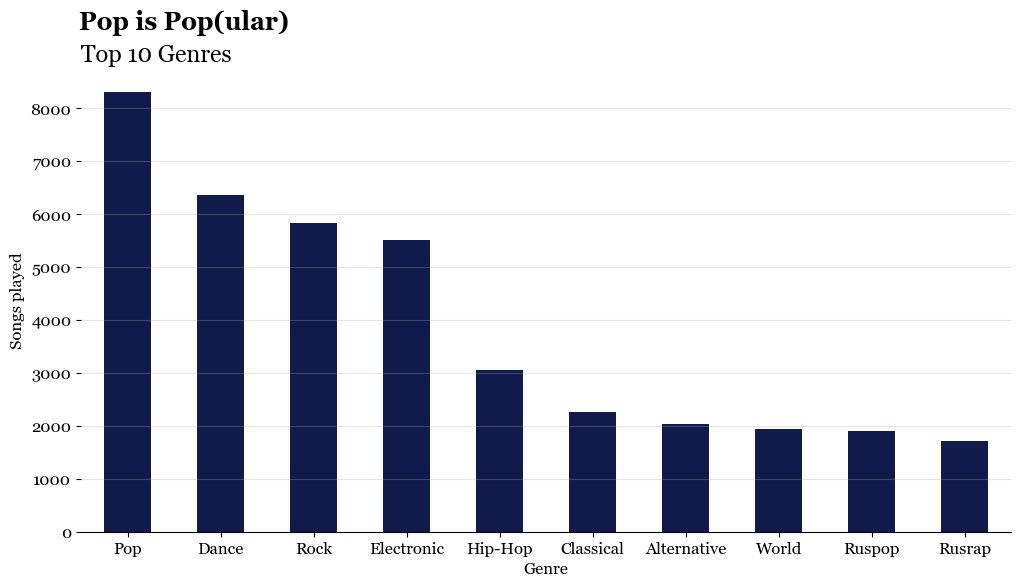

Genre
Pop            8316
Dance          6362
Rock           5839
Electronic     5520
Hip-Hop        3055
Classical      2260
Alternative    2028
World          1945
Ruspop         1909
Rusrap         1724
Name: count, dtype: int64

In [181]:
fig, ax = plt.subplots(figsize=[12, 6])
df['Genre'].value_counts().head(10) \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Pop is Pop(ular)', weight='bold',
             ha='left', x=0.123, size=18)
plt.title('Top 10 Genres', loc='left',
          size=17)
plt.xticks(rotation=0)
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
df['Genre'].value_counts().head(10)

In [88]:
# Find the percentage of popular genres
df['Genre'].value_counts().iloc[0:4].sum() / df.shape[0] * 100

42.53716712955399

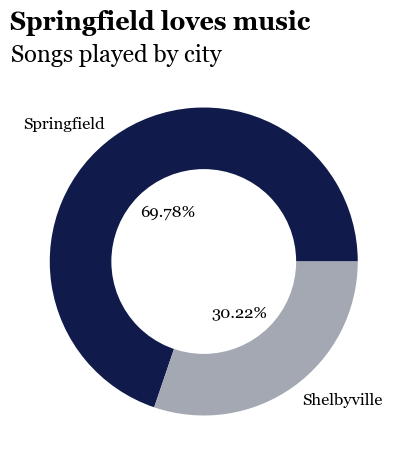

In [89]:
# Create city plot
fix, ax = plt.subplots(figsize=[5, 5])
df['City'].value_counts() \
    .plot.pie(autopct='%1.2f%%', pctdistance=0.4,
              colors=[juan_colors[0], juan_colors[2]],
              ax=ax)
plt.suptitle('Springfield loves music', ha='left',
             x=0.125, y=1, size=18, weight='bold')
plt.title('Songs played by city', loc='left',
          size=17)
plt.ylabel('')
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

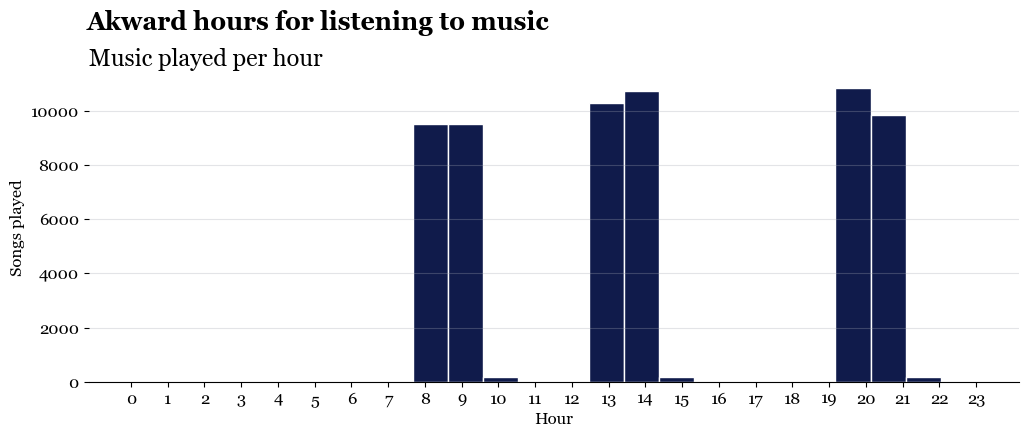

Hour
8      9510
9      9504
10      169
13    10299
14    10715
15      176
20    10821
21     9844
22      172
Name: count, dtype: int64

In [182]:
# Create de hour column
df['Hour'] = pd.to_datetime(df['Hour_of_Play'], format='%H:%M:%S').dt.hour

fig, ax = plt.subplots(figsize=[12, 4])
plt.hist(df['Hour'], bins=24, range=(0, 23), edgecolor='white',
         color=juan_colors[0])
plt.suptitle('Akward hours for listening to music', ha='left',
             x=0.123, y=1.04, size=18, weight='bold')
plt.title('Music played per hour', loc='left',
          size=17)
plt.xlabel('Hour')
plt.xticks(range(24))
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
df['Hour'].value_counts().sort_index()

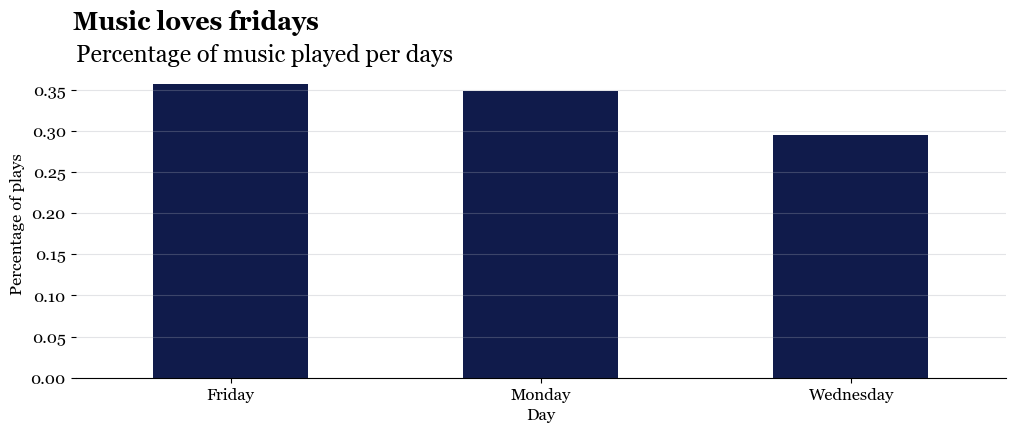

Day_of_the_Week
Friday       21827
Monday       21338
Wednesday    18045
Name: count, dtype: int64

In [184]:
fig, ax = plt.subplots(figsize=[12, 4])
df['Day_of_the_Week'].value_counts(normalize=True) \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Music loves fridays', ha='left',
             x=0.123, y=1.03, size=18, weight='bold')
plt.title('Percentage of music played per days',
          size=17, loc='left')
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.ylabel('Percentage of plays')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
df['Day_of_the_Week'].value_counts()

We found that we do not have unique user rows, our top user has from 71 to 30 rows of music played.

The 64.77% of rows has unique Tracks and the unknown name and artist tracks has the most amount of played tracks with 1260, we are not going to drop them because they are not that significant for this analysis. Later we found on our list the song Brand by Kartvelli with 127 records, then So Long by MALFA with 109 records and Going Back by Real Bodrit with 90 records.

In the same way, Kartvelli has the most amount of played songs with 127 records after the unknown records that are 7093. In the third position, we found MALFA with 109 records and Real Bodrit with 90 records.

About genres, Pop with 8316 songs played, Dance music with 6362 songs played, Rock music with 5839 songs played and Electronic music with 5520 represents the 42.53% of all played music are the favorite music genres of those two cities. Followed by Hip-Hop, Classical, Alternative and World music.

The same week, Springfield has the 69.78% of the records played agains 30.22% of Shelbyville, that is a clear difference between the amound of music played and differences of consumption.

Talking about the hour of playing, we have a significant problem with our dataframe, because we have a giant bias, it is not logical that the people listen to music just three hours in a single day, and that there are zero played songs on another hours. And other bias we have in our dataset is about the day of the week, because we have only records of monday, wednesday and friday, been friday and monday the days with most music played, more than 21000 records, and wednesday is the worst day with 18045 records.

# <span style="color:#0F19C9">Multivariable analysis</span>

In [92]:
# Find the favorite tracks by user
df[df['Track'] != 'Unknown'].groupby(['User_ID', 'Track'])[
    'Track'].count().sort_values(ascending=False).head(5)

User_ID   Track            
D5F7E06D  Tourdion             10
B3AEE0E   I Can Change         10
E2EA9731  El Mudo               9
A4B31EA7  Aquaman               8
3E4BFAA7  How High the Moon     8
Name: Track, dtype: int64

In [93]:
# Find the favorite artist by user
df[df['Artist'] != 'Unknown'].groupby(['User_ID', 'Artist'])[
    'Artist'].count().sort_values(ascending=False).head(2)

User_ID   Artist     
F3361E35  Faiha          3
3ABD7F5F  Novi Fosili    3
Name: Artist, dtype: int64

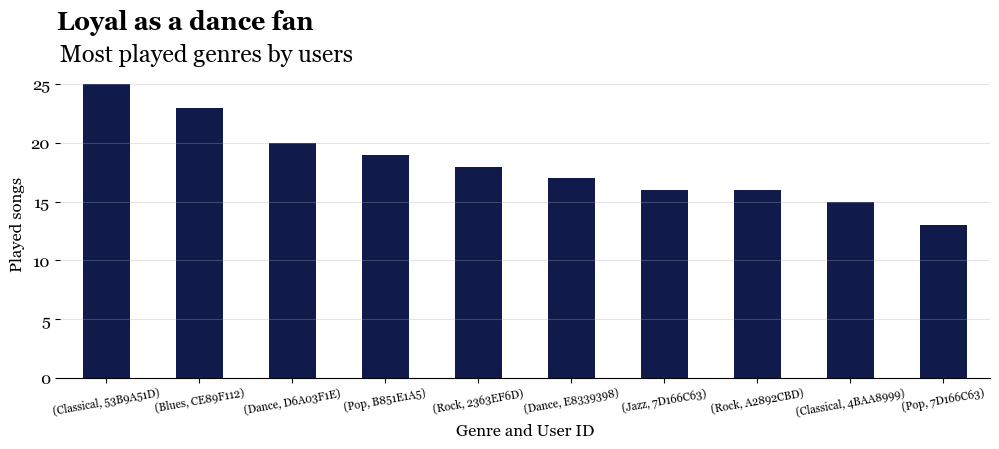

Genre      User_ID 
Classical  53B9A51D    25
Blues      CE89F112    23
Dance      D6A03F1E    20
Pop        B851E1A5    19
Rock       2363EF6D    18
Dance      E8339398    17
Jazz       7D166C63    16
Rock       A2892CBD    16
Classical  4BAA8999    15
Pop        7D166C63    13
Name: Track, dtype: int64

In [187]:
# Find favorite genres by user
favorite_genres = df[df['Genre'] != 'Unknown'].groupby(
    ['Genre', 'User_ID'])['Track'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[12, 4])
favorite_genres.head(10) \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Loyal as a dance fan', ha='left',
             size=18, weight='bold', x=0.123, y=1.03)
plt.title('Most played genres by users', loc='left',
          size=17)
plt.xlabel('Genre and User ID')
plt.xticks(rotation=10, size=8)
plt.ylabel('Played songs')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

# Show the count in a table
favorite_genres.head(10)

In [188]:
# Create a table of the city and genre relation
genre_per_city = df.pivot_table(
    index='Genre', columns='City', values='Track', aggfunc='count', fill_value=0)

# Favorites genres by cities
shelbyville_genres = genre_per_city.sort_values(
    by='Shelbyville', ascending=False).head(5)
springfield_genres = genre_per_city.sort_values(
    by='Springfield', ascending=False).head(5)

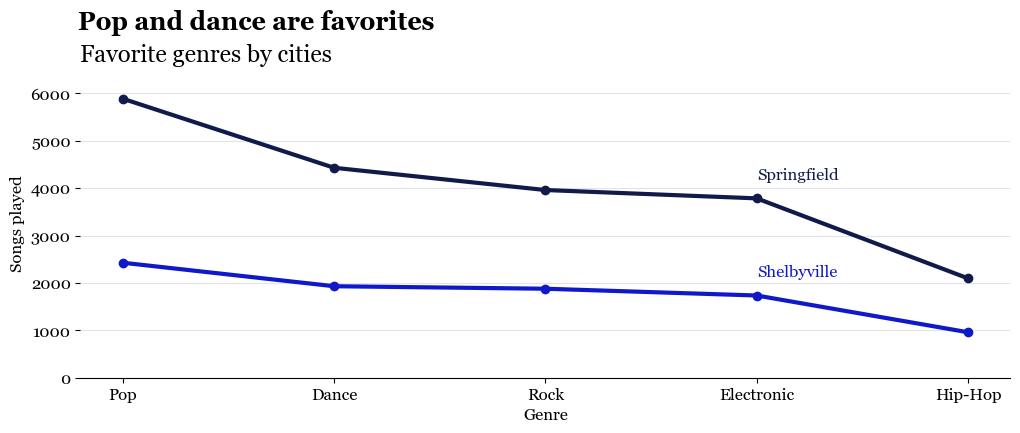

In [285]:

fig, ax = plt.subplots(figsize=[12, 4])
plt.plot(shelbyville_genres.index,
         shelbyville_genres['Shelbyville'],
         color=juan_colors[4],
         linewidth=3,
         marker='o')
ax.annotate('Shelbyville',
            xy=(shelbyville_genres.index[-2],
                shelbyville_genres['Shelbyville'].values[-2] + 400),
            color=juan_colors[4])
plt.plot(springfield_genres.index,
         springfield_genres['Springfield'],
         color=juan_colors[0],
         linewidth=3,
         marker='o')
ax.annotate('Springfield',
            xy=(springfield_genres.index[-2],
                springfield_genres['Springfield'].values[-2] + 400),
            color=juan_colors[0])
plt.suptitle('Pop and dance are favorites',
             ha='left', x=0.123, y=1.03,
             size=18, weight='bold')
plt.title('Favorite genres by cities',
          loc='left', size=17)
plt.ylim(0, 6500)
plt.xlabel('Genre')
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

We found that Tourdion is the favorite track of the user `D5F7E06D`, he played 10 times as well as I Can Change is the favorite track of the user `B3AEE0E`. El mudo is the favorite track of the user `E2EA9731` with 9 times played. And Aquaman and How High the Moon are the favorites songs of `A4B31EA7` and `3E4BFAA7` respectively with 8 times played. There is no one favorite track for various users.

We found that only few users listen 3 times the same artist, that against the number of tracks played, became not significant.

Unless we have 1 user that have listened 25 times classical songs, we found two users that have listened dance music followed by two users that have listened many rock songs, those are the genres which most people have listened music on. But in general, the main consumption of music is Pop, in both cities, followed by dance music, next rock, electronic and Hip-Hop music, in the same order.

In [239]:
# Create a pivot table of hour and genre
genre_per_hour = df.pivot_table(index='Hour', columns='Genre',
                                values='Track', aggfunc='count',
                                fill_value=0).reindex(range(24), fill_value=0)

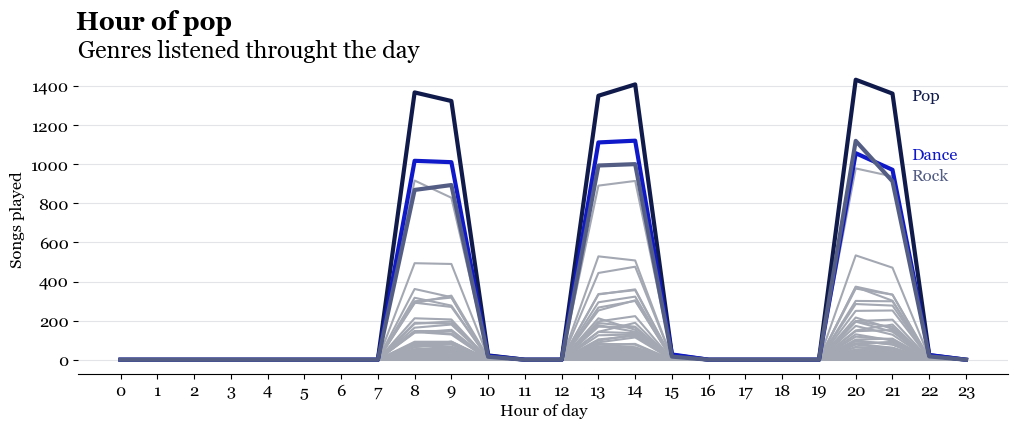

In [286]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Hour of pop', x=0.123,
             size=18, weight='bold',
             ha='left', y=1.02)
plt.title('Genres listened throught the day',
          size=17, loc='left')
for genre in genre_per_hour.columns:
    plt.plot(genre_per_hour.index,
             genre_per_hour[genre],
             color=juan_colors[2])
plt.plot(genre_per_hour.index,
         genre_per_hour['Pop'],
         color=juan_colors[0],
         linewidth=3)
ax.annotate('Pop', color=juan_colors[0],
            xy=(21.5, genre_per_hour['Pop'].values[-2] + 1300))
plt.plot(genre_per_hour.index,
         genre_per_hour['Dance'],
         color=juan_colors[4],
         linewidth=3)
ax.annotate('Dance', color=juan_colors[4],
            xy=(21.5, genre_per_hour['Dance'].values[-2] + 1000))
plt.plot(genre_per_hour.index,
         genre_per_hour['Rock'],
         color=juan_colors[1],
         linewidth=3)
ax.annotate('Rock', color=juan_colors[1],
            xy=(21.5, genre_per_hour['Rock'].values[-2] + 900))
plt.xticks(range(24))
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.xlabel('Hour of day')
plt.ylabel('Songs played')
plt.show()

In [287]:
hour_per_city = df.pivot_table(index='Hour', columns='City',
                               values='Track', aggfunc='count').reindex(range(24), fill_value=0)
hour_per_city['Shelbyville'] = round(
    hour_per_city['Shelbyville'] / hour_per_city['Shelbyville'].sum(), 2)
hour_per_city['Springfield'] = round(
    hour_per_city['Springfield'] / hour_per_city['Springfield'].sum(), 2)

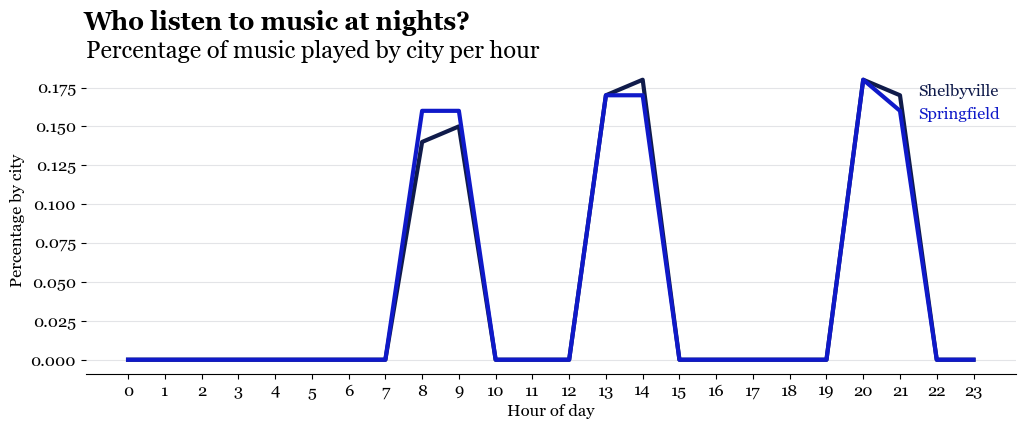

In [293]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Who listen to music at nights?',
             x=0.123, ha='left', size=18,
             weight='bold', y=1.02)
plt.title('Percentage of music played by city per hour',
          loc='left', size=17)
plt.plot(hour_per_city.index,
         hour_per_city['Shelbyville'],
         color=juan_colors[0],
         linewidth=3)
ax.annotate('Shelbyville',
            xy=(21.5, 0.17),
            color=juan_colors[0])
plt.plot(hour_per_city.index,
         hour_per_city['Springfield'],
         color=juan_colors[4],
         linewidth=3)
ax.annotate('Springfield',
            xy=(21.5, 0.155),
            color=juan_colors[4])
plt.xticks(range(24))
plt.xlabel('Hour of day')
plt.ylabel('Percentage by city')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

In [303]:
# Create a table of day of the week per city
day_per_city = df.pivot_table(index='Day_of_the_Week', columns='City',
                              values='Track', aggfunc='count')
day_per_city['Shelbyville'] = round(
    day_per_city['Shelbyville'] / day_per_city['Shelbyville'].sum(), 2)
day_per_city['Springfield'] = round(
    day_per_city['Springfield'] / day_per_city['Springfield'].sum(), 2)
day_per_city

City,Shelbyville,Springfield
Day_of_the_Week,,
Friday,0.32,0.37
Monday,0.30,0.37
Wednesday,0.38,0.26


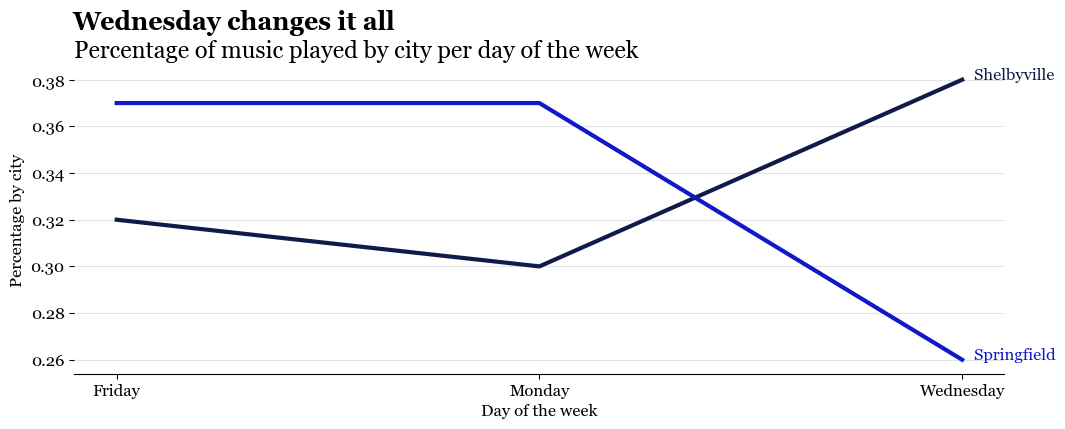

In [304]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Wednesday changes it all',
             x=0.123, ha='left', size=18,
             weight='bold', y=1.02)
plt.title('Percentage of music played by city per day of the week',
          loc='left', size=17)
plt.plot(day_per_city.index,
         day_per_city['Shelbyville'],
         color=juan_colors[0],
         linewidth=3)
ax.annotate('   Shelbyville',
            xy=(day_per_city.index[-1],
                day_per_city['Shelbyville'].values[-1]),
            color=juan_colors[0])
plt.plot(day_per_city.index,
         day_per_city['Springfield'],
         color=juan_colors[4],
         linewidth=3)
ax.annotate('   Springfield',
            xy=(day_per_city.index[-1],
                day_per_city['Springfield'].values[-1]),
            color=juan_colors[4])
plt.xlabel('Day of the week')
plt.ylabel('Percentage by city')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

We can say for sure that Pop music is a genre that people listen to every hour of the day, meanwhile dance music people enjoy more from 12 to 15. And rock music is a genre that people enjoy more at night, much more than in the morning.

After we look for the differences in the amount of records for every city, we understand the consumption from the percentage of population, then we can conclude that people listen to more music at nights and less in the mornings. And we can say that mondays and fridays are days of relatively the same consumption, but wednesday has a big difference, because in Shelbyville people listen to music 8% more than other days, while in Springfield people listen to music 9% less.

In [305]:
# Create a table of hour of day per day of the week
hour_per_day = df.pivot_table(index='Hour',
                              columns='Day_of_the_Week',
                              values='Track',
                              aggfunc='count').reindex(range(24), fill_value=0)

Day_of_the_Week,Friday,Monday,Wednesday
Hour,,,
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,3572,3438,2500


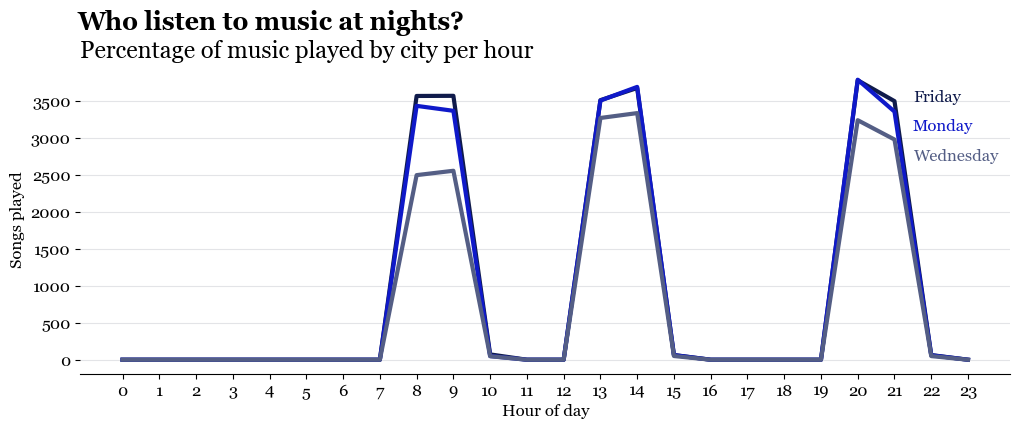

In [313]:
fig, ax = plt.subplots(figsize=[12, 4])
plt.suptitle('Who listen to music at nights?',
             x=0.123, ha='left', size=18,
             weight='bold', y=1.02)
plt.title('Percentage of music played by city per hour',
          loc='left', size=17)
plt.plot(hour_per_day.index,
         hour_per_day['Friday'],
         color=juan_colors[0],
         linewidth=3)
ax.annotate('Friday',
            xy=(21.5, 3500),
            color=juan_colors[0])
plt.plot(hour_per_day.index,
         hour_per_day['Monday'],
         color=juan_colors[4],
         linewidth=3)
ax.annotate('Monday',
            xy=(21.5, 3100),
            color=juan_colors[4])
plt.plot(hour_per_day.index,
         hour_per_day['Wednesday'],
         color=juan_colors[1],
         linewidth=3)
ax.annotate('Wednesday',
            xy=(21.5, 2700),
            color=juan_colors[1])
plt.xticks(range(24))
plt.xlabel('Hour of day')
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.show()

Friday is the day of the week with most music consumption in those two cities. Next we can make some campaings around monday because near noon there is good consumption, but wednesday is the worst day at every hour.